# 凸関数

凸最適化は色んな所で出てきます。
ここでは凸最適化で出てくる、基本的な凸関数の知識をまとめておきます。


参考

* [Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)の3章
* [凸解析の基礎: 凸錐・凸集合・凸関数 (数理経済学叢書)](https://www.amazon.co.jp/dp/4862852467)：良さそう。未読。
* [Intuition behind Legendre convex function](https://math.stackexchange.com/questions/4281836/intuition-behind-legendre-convex-function)
* [Geometric intuition of conjugate function](https://math.stackexchange.com/a/3192354)
* [Bandit Algorithms](https://tor-lattimore.com/downloads/book/book.pdf)の26.4章
* [Reinforcement Learning via Fenchel-Rockafellar Duality](https://arxiv.org/abs/2001.01866)

## 凸関数

* 凸関数：ある関数$f: \mathbb{R}^n \to \mathbb{R}$は$\text{ dom } f$は次を満たす時に凸関数と呼ぶ：
  * $\text{ dom } f$が凸集合
  * 任意の$x, y \in \operatorname{dom} f$について、$f(\theta x + (1 - \theta) y) \leq \theta f(x) + (1 - \theta) f(y)$
  * 特に$0 < \theta < 1$かつ$x\neq y$で$<$の不等式が成り立っている場合、これは強凸関数と言う。
  * 任意のアフィン関数は凸かつ凹関数である。また、任意の凸かつ凹関数はアフィン関数である。

$x\notin \text{ dom } f$については、次のように$\infty$を割り当てると便利なことが多い。

$$
\tilde{f} = 
\begin{cases}
f(x) \; & x \in \text{ dom } f \\
\infty \; & x \notin \text{ dom } f
\end{cases}
$$


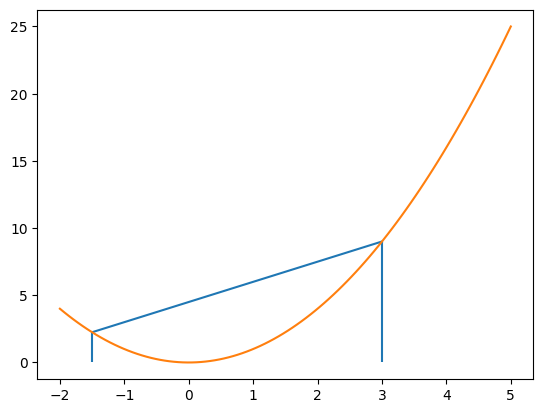

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 5, 100)
f = np.linspace(-2, 5, 100) ** 2
a, b = -1.5, 3
plt.vlines(x=a, ymin=0, ymax=a ** 2)
plt.vlines(x=b, ymin=0, ymax=b ** 2)

ab = np.linspace(a, b, 100)
theta = np.linspace(0, 1, 100)
rhs = (1 - theta) * (a ** 2) + theta * (b ** 2)
plt.plot(ab, rhs)
plt.plot(x, f)

## 凸関数の例

### 一次元

* Exponential. $e^{a x}$ is convex on $\mathbf{R}$, for any $a \in \mathbf{R}$.
* Powers. $x^a$ is convex on $\mathbf{R}_{++}$ when $a \geq 1$ or $a \leq 0$, and concave for $0 \leq a \leq 1$.
* Powers of absolute value. $|x|^p$, for $p \geq 1$, is convex on $\mathbf{R}$.
* Logarithm. $\log x$ is concave on $\mathbf{R}_{++}$
* Negative entropy. $x \log x$ (either on $\mathbf{R}_{++}$, or on $\mathbf{R}_{+}$, defined as 0 for $x=0$ ) is convex.

/tmp/ipykernel_9010/1417574194.py:6: RuntimeWarning: invalid value encountered in power
  plt.plot(x, x ** 1.5, label="power")
/tmp/ipykernel_9010/1417574194.py:8: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.log(x), label="logarithm")
/tmp/ipykernel_9010/1417574194.py:9: RuntimeWarning: invalid value encountered in log
  plt.plot(x, x * np.log(x), label="negative entropy")


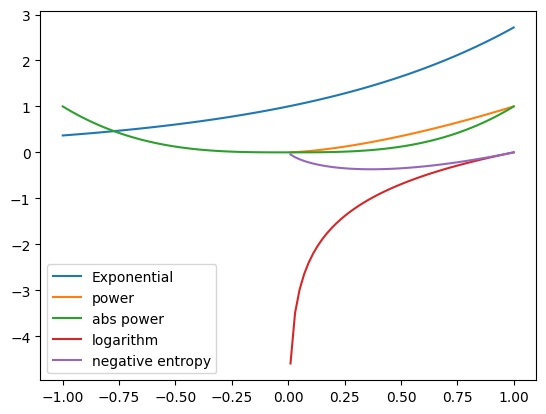

In [36]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
plt.plot(x, np.exp(x), label="Exponential")
plt.plot(x, x ** 1.5, label="power")
plt.plot(x, np.abs(x) ** 3, label="abs power")
plt.plot(x, np.log(x), label="logarithm")
plt.plot(x, x * np.log(x), label="negative entropy")

plt.legend()

### 多次元

* Norms. Every norm on $\mathbf{R}^n$ is convex.
    * 証明：三角不等式より、 $f(\theta x+(1-\theta) y) \leq f(\theta x)+f((1-\theta) y)=\theta f(x)+(1-\theta) f(y)$.
* Max function. $f(x)=\max \left\{x_1, \ldots, x_n\right\}$ is convex on $\mathbf{R}^n$.
    * 省略
* Quadratic-over-linear function. The function $f(x, y)=x^2 / y$, with
$
\operatorname{dom} f=\mathbf{R} \times \mathbf{R}_{++}=\left\{(x, y) \in \mathbf{R}^2 \mid y>0\right\}
$
is convex.
    * 証明：$\nabla^2 f(x, y)=\frac{2}{y^3}\left[\begin{array}{cc}y^2 & -x y \\ -x y & x^2\end{array}\right]=\frac{2}{y^3}\left[\begin{array}{c}y \\ -x\end{array}\right]\left[\begin{array}{c}y \\ -x\end{array}\right]^T \succeq 0$
    * 最後の部分は、任意のベクトル$v=[p, q]$について$v^TAv=(yp - xq)^2$になるので正則行列。
* Log-sum-exp. The function $f(x)=\log \left(e^{x_1}+\cdots+e^{x_n}\right)$ is convex on $\mathbf{R}^n$.これはMaxの近似に近い。
    * 省略。ただし、ヘッセ行列を考えればすぐわかる。

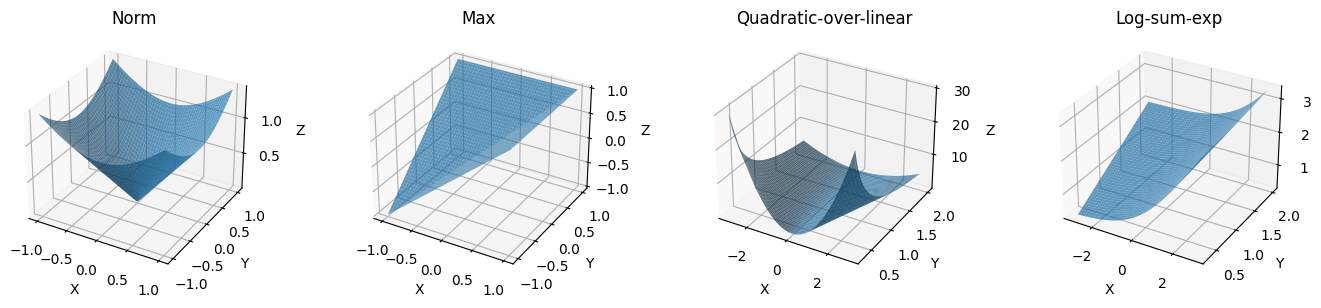

In [70]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 3))

# Norm
ax = fig.add_subplot(141, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X ** 2 + Y ** 2)
surf = ax.plot_surface(X, Y, Z, alpha=0.7)
plt.title("Norm")

# Max
ax = fig.add_subplot(142, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = np.maximum(X, Y)
surf = ax.plot_surface(X, Y, Z, alpha=0.7)
plt.title("Max")

# Quadratic-over-linear
ax = fig.add_subplot(143, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

x = np.linspace(-3, 3, 100)
y = np.linspace(0.3, 2, 100)
X, Y = np.meshgrid(x, y)
Z = (X ** 2) / Y
surf = ax.plot_surface(X, Y, Z, alpha=0.7)
plt.title("Quadratic-over-linear")


# Log-sum-exp
ax = fig.add_subplot(144, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

x = np.linspace(-3, 3, 100)
y = np.linspace(0.3, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.log(np.exp(X) + np.exp(Y))
surf = ax.plot_surface(X, Y, Z, alpha=0.7)
plt.title("Log-sum-exp")


plt.tight_layout()

## Sublevel集合とEpigraph

* 関数$f: \mathbb{R}^n \to \mathbb{R}$の$\alpha$-sublevel集合：$C_\alpha = \{x \in \text{ dom } f | f(x) \leq \alpha \}$　
    * 凸関数のsublevel集合は凸集合。
        * 証明：$x, y \in C_\alpha$について、$f(x) \leq \alpha$および$f(y) \leq \alpha$なので$f(\theta x + (1 - \theta)y) \leq \alpha$が$0 \leq \theta \leq 1$で成り立つ。よって、$\theta x + (1 - \theta) y \in C_\alpha$。　
        * この逆は成り立たないことに注意。例えば$f(x) = -e^x$
* 関数$f: \mathbb{R}^n \to \mathbb{R}$のGraph：$\{(x, f(x))| x\in \text{ dom } f\}$
    * これは$\mathbb{R}^{n+1}$のsubsetであることに注意
* 関数$f: \mathbb{R}^n \to \mathbb{R}$のEpigraph：$\text{ epi } f = \{(x, t)| x\in \text{ dom } f, f(x) \leq t\}$
    * EpigraphのEpiはAboveと同じです。つまり``graphの上``を意味します。
    * Epigraphのイメージは下の図参照
    * 関数$f$が凸関数 $\Longleftrightarrow$ $f$のEpigraphが凸集合

![epigraph](figs/epigraph.png)

## 凸関数の確認

### 直線上で確認

* ある関数が凸関数 $\Longleftrightarrow$ 任意の$x \in \text{ dom } f$と任意の$v$について、$g(t) = f(x + tv)$が凸関数。　
  * これは凸性の確認が直線を確認すればできる点で便利。

### テイラー展開で確認

* ある関数が凸関数 $\Longleftrightarrow$ $\text{ dom } f$が凸集合かつ$f(y) \geq f(x) + \nabla f(x)^T (y - x)$が任意の$x, y \in \text{ dom } f$で成立。 
  * つまり、ある点のテイラー展開が関数のUnder estimatorの場合、凸関数。逆も成立。
  * $\nabla f(x)=0$なら$x$は最小な$x$
  * $\geq$が$>$なら強凸性
  * 下の図（[Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)のFigure 3.2参照）：

![first-order](figs/first-order-convex.png)

---

**証明**

1次元の場合だけ示す。

必要性：$f$が凸のとき、$f(y) \geq f(x)+f^{\prime}(x)(y-x)$であることを示す。

$f$が凸のとき、$\text{ dom } f$が凸集合。よって、$0<t \leq 1, x+t(y-x) \in \operatorname{dom} f$であり、$f$の凸性から

$$f(x+t(y-x)) \leq(1-t) f(x)+t f(y)$$

である。両辺を$t$で割って、　

$$
f(y) \geq f(x)+\frac{f(x+t(y-x))-f(x)}{t}
$$

であり、$t\to 0$で必要性が示せた。

十分性：$f(y) \geq f(x)+f^{\prime}(x)(y-x)$のとき、$f$が凸であることを示す。

$z = \theta x + (1 - \theta)y$とする。このとき、$f(x) \geq f(z)+f^{\prime}(z)(x-z), \quad f(y) \geq f(z)+f^{\prime}(z)(y-z)$である。
最初の不等式を$\theta$倍、次の不等式を$(1 - \theta)$倍すると、$\theta f(x)+(1-\theta) f(y) \geq f(z)$が成立する。これは$f$が凸であることそのもの。

---


### ヘッセ行列で確認

* ある関数が凸関数 $\Longleftrightarrow$ $\text{ dom } f$が凸集合かつ$f$のヘッセ行列が正則行列。つまり、任意の$x \in \text{ dom } f$で$\nabla^2 f(x) \succeq 0$。
  * $\nabla^2 f(x) \succ 0$なら強凸関数だが、逆は成り立たない。例えば$f(x)=x^4$は強凸関数だが、$x=0$で$\nabla^2 f(x) = 0$。

TODO: 証明

**集合での確認**

* 関数$f$が凸関数 $\Longleftrightarrow$ $f$のEpigraphが凸集合

## 不等式

TODO:
* Jensenの不等式

## Bregman Divergence

参考
* [Bregmanダイバージェンスのwikipedia](https://en.wikipedia.org/wiki/Bregman_divergence)

Bregman divergenceは２点間の遠近を数値化するときに便利な概念であり、凸最適化問題を解くために[Bregman](https://www.sciencedirect.com/science/article/pii/0041555367900407)によって導入されました。
特に空間に凸関数があるときに便利です。ユークリッド距離もBregman Divergenceに属します。

凸関数$f:\mathbb{R}^d\to \mathbb{R}$、$x, y \in \mathbb{R}^d$、$y\in \mathrm{dom}(f)$とします。
このとき、$y$における$f$のBregman Divergenceは次のように定義されます：

$$
B_f(x, y)=f(x)-f(y)-\nabla_{x-y} f(y)
$$

ここで、
$$
\nabla_v f(y)=\lim _{h \rightarrow 0^{+}}(f(y+h v)-f(y)) / h \in \mathbb{R} \cup\{-\infty, \infty\}
$$
は$y$における$f$の方向$v$についての方向微分です。特に$f$が$y$において微分可能であれば、$\nabla_v f(y)=\langle v, \nabla f(y)\rangle$であり、このとき
$$
B_f(x, y)=f(x)-f(y)-\langle x-y, \nabla f(y)\rangle
$$
になります。

|        Function $f:\mathbb{R}^d\to \mathbb{R}$      |       Divergence       |                     Notes                    |
|:---------------------:|:---------------------:|:--------------------------------------------:|
| $\frac{1}{2}\|x\|_2^2$ | $\frac{1}{2} \|x - y\|^2_2$ | ユークリッド距離です。|
| $\langle p, \log p\rangle$ | $D_{KL}(p \| q) = \langle p, \log\frac{p}{q}\rangle$ | Functionは負のエントロピー、DivergenceはKLダイバージェンス |
| $-\langle p, \log p\rangle$ | $D_{F}(p \| q) = \langle p, \frac{p}{q} - \log \frac{p}{q} - 1\rangle$ | Functionはエントロピー、DivergenceはItakura-Satioダイバージェンス |
| $x\log(x) + (1 - x)\log(1 - x)$ | $x \log \frac{x}{y}+(1-x) \log \frac{1-x}{1-y}$| $d=1$のとき。このダイバージェンスはLogistic損失です |



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# 適当な凸関数を用意します
x = np.linspace(-1.0, 1.0, 30)
f = x ** 2


def plot_bregman_divergence(y):
    fy = y ** 2
    nabla_fy = 2 * y
    tangent = fy + (x - y) * nabla_fy

    plt.plot(x, f, label=r"$f$")

    plt.scatter(y, fy, label=r"$-f(y)$")
    plt.plot(x, tangent, color="green", label=r"$f(y) + \langle x - y, \nabla f(y) \rangle$")
    plt.fill_between(x, f, tangent, label=r"$B_f$")

    plt.grid()
    plt.legend()
    plt.ylim(-0.3, 1.3)
    plt.xlabel("x")

    plt.show()

interact(plot_bregman_divergence, y=(-1, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='y', max=1.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.plot_bregman_divergence(y)>

Bregman Divergenceについては次が成立します。
1. $B_f(x, y) \geq 0 \text { for all } y \in \operatorname{dom}(f)$
2. $B_f(x, x)=0 \text { for all } x \in \operatorname{dom}(f)$
3. $B_f(x, y) \text { is convex as a function of } x \text { for any } y \in \operatorname{dom}(\nabla f)$

この３つが成立する理由は上の図から直感的に明らかですね。凸関数についてはその接線が必ず下に来るので、$B_f(x, y)$は必ず正になります。

## 凸性を保存する作用素

TODO:

## 凸共役

参考：
* [Reinforcement Learning via Fenchel-Rockafellar Duality](https://arxiv.org/abs/2001.01866)
* [Geometric intuition of conjugate function](https://math.stackexchange.com/a/3192354)

双対性は最適化や機械学習で非常に便利なテクニックです。
もともとの問題をもっと扱いやすい形式に変形することができる場合があります。

関数$f: \mathbb{R}^n \to \mathbb{R}$の（Fenchel）共役関数は次で定義されます：

$$f^*(y)=\sup _{x \in \operatorname{dom} f}y^T x-f(x)$$

* $y \in \mathbf{R}^n$のうち、supが有限の箇所が共役関数のdomain。
* $f^*(y)$は$y$のAffine関数について$sup$を取ってるので凸関数。これは$f$が凸かどうかに関係ない。
* Fenchel共役は凸共役とも呼ばれます

### 直感的な解釈と幾何的な解釈

#### 直感的な解釈

共役関数は「収入と利益」を例として考えれば直感的にわかりやすいです。
例えば次の設定を考えてみます。

* 手作りの人形を$x$個売ります
  * 人形の制作にはコストがかかり、作るためにかかるお金（疲労回復代）は凸関数になるとします。
* 人形は$y$円で売ります。そのため、収入は$yx$円であり、利益は$yx - f(x)$です。

このとき、最適な個数を売った場合の最大の利益は

$$f^*(y) = \sup_{x\in \mathrm{dom}\; f}\; yx - f(x)$$

になっています。これは共役関数の定義そのものです。
つまり、**$x$個生産するためのコストの共役関数は、価格$y$で販売したときの最適な利益になります。**
これのように共役関数を考えると、**個数**についての関数が**価格**についての関数に変換されます。
また、特に$f$が滑らかな凸関数である場合は共役関数の解析解が一発で求まり、利益についての見通しがしやすくなったりします。

一方で、$f^*$の共役関数、つまり$\sup_{y\in \mathrm{dom}\; f^*}\; yx - f^*(y)$を考えてみましょう。
これは**収入-利益であり、コストと同じ**ですね。つまり、共役の共役を取ると元の関数に戻っています。

#### 幾何的な解釈

* 特に$f$が微分可能なとき、共役関数は便利な性質を持ちます。そのため、微分可能な$f$についての共役関数は **$f$のルジャンドル変換** とも呼ばれます。
* 通常の共役関数と区別するために、$f$が微分可能なときの共役関数は **Fenchel共役関数** とも呼ばれます。

$f$が微分可能なとき、$y^T x-f(x)$は$x$について微分すれば、$f^\prime(x)=y$のうち、最も$yx - f(x)$が大きい$x$でsupを取ることがわかります。
よって、$f^*(y)$は$yx$と$f(x)$の接線のうち、一番下にあるものと$y$軸との交点になります。


### 共役関数の例

|        Function       |       Conjugate       |                     Notes                    |
|:---------------------:|:---------------------:|:--------------------------------------------:|
| $\frac{1}{p} \|x\|^p$ | $\frac{1}{q} \|y\|^q$ | $p, q>0$ かつ $\frac{1}{p} + \frac{1}{q} = 1$ のとき |
|           $\delta_{\{a\}}(x)$           |  $\langle a, y\rangle$                     |    ここで$\delta_C(x)$は$x\in C$なら0であり、それ以外では$\infty$を取る関数                                           |
|           $\delta_{\mathbb{R}_+}(x)$           |  $\delta_{\mathbb{R}_-}(y)$                     |    $\mathbb{R}_{ \pm}:=\{x \in \mathbb{R} \mid \pm x \geq 0\}$ |
|     $\langle a, x\rangle+b \cdot f(x)$           |  $ b \cdot f_*\left(\frac{y-a}{b}\right)$                     | |
|     $D_{KL}(x \| p)$ | $\log \mathbb{E}_{z \sim p}[\exp y(z)]$ | $x \in \Delta(\mathcal{Z})$は正規化された$\mathcal{Z}$上の分布 |
| $\langle a, x\rangle + b$ | $-b$ | $f^*$のDomainは$\{a\}$のみ（$\langle y, x\rangle - \langle a, x \rangle - b$が上に有限なのは$\{a\}$だけなので）|
| $f(x)=-\log x$ | $-\log (-y)-1$ | $f^*$のDomainは$\{y \mid y<0\}=-\mathbf{R}_{++}$のとき|
| $D_f(x \| p)$ | $\mathbb{E}_{z \sim p}\left[f_*(y(z))\right]$ | $p$は$\mathcal{Z}$上の分布であり、$x:\mathcal{Z}\to \mathbb{R}$のときのみ。$D_f$は後で出てくる$f$-ダイバージェンス。 |

* 負の対数関数. $f(x)=-\log x$：$yx + \log x$は$y < 0$のとき上に有限（$x=-1/y$が最大値）。
    * $f^*$のdomain：$\{y \mid y<0\}=-\mathbf{R}_{++}$
    * 解析解：$f^*(y)=-\log (-y)-1$ for $y<0$
* Log-sum-exp. $f(x)=\log \left(\sum_{i=1}^n e^{x_i}\right)$：Log-sum-expの微分はソフトマックス関数（参考：[LogSumExp](https://en.wikipedia.org/wiki/LogSumExp)）であることに注意。よって、$f^\prime(x)=y$なので、$y_i=\frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}, \quad i=1, \ldots, n$が成立する。これを$x$についての式に変形して$y^T x-f(x)$に代入すれば解析解が出てくる。
    * $f^*$のdomain：$\mathbf{1}^T y=1, y \succeq 0$
    * 解析解：$f^*(y) = \sum_{i=1}^n y_i \log y_i$
    * つまり、log-sum-expの共役関数は負のエントロピーであり、そのdomainは確率のsimplexになる。


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# 適当な関数（非凸）を用意します
x = np.linspace(-0.6, 0.5, 30)
f = x ** 4 - 0.7 * x **2 + 0.1 * x + 1.5 * np.cos(10 * x) * 0.1 + 0.3

f_conj = []
arg_f_conj = []
ys = np.arange(-1, 1.1, 0.1)
for y in ys:
    xy = y * x
    xy_f = xy - f
    sup_xy_f = np.max(xy_f)  # f*(y)です
    arg_sup_xy_f = np.argmax(xy_f)  # argsup_x yx - f(x) です
    f_conj.append(sup_xy_f)
    arg_f_conj.append(sup_xy_f)  # argsup_x yx - f(x) です

f_conj = np.array(f_conj)
arg_f_conj = np.array(arg_f_conj)


def plot_conjugate(y):
    # 主関数をベースにプロットします
    xy = y * x
    xy_f = xy - f
    sup_xy_f = np.max(xy_f)  # f*(y)です
    arg_sup_xy_f = np.argmax(xy_f)  # argsup_x yx - f(x) です
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x, f, label=r"$f$")
    plt.plot(x, xy - sup_xy_f, label=r"$xy - f*(y)$")
    plt.plot(x, xy_f, label=r"$xy - f$")

    # 交点をプロットします
    plt.scatter(x[arg_sup_xy_f], f[arg_sup_xy_f])
    plt.scatter(x[arg_sup_xy_f], sup_xy_f)
    plt.scatter(0, -sup_xy_f, label=r"-f*(y)")

    plt.grid()
    plt.legend()
    plt.ylim(-0.8, 0.8)
    plt.xlabel("x")
    plt.title("Primal Function")

    # 双対関数をベースにプロットします
    plt.subplot(1, 2, 2)
    plt.scatter(y, sup_xy_f)
    plt.plot(ys, f_conj, label=r"f^*(y)")
    plt.xlabel("y")
    plt.title("Conjugate Function")
    plt.grid()
    plt.legend()

    plt.show()

interact(plot_conjugate, y=(-1, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='y', max=1.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.plot_conjugate(y)>

## 凸共役の性質

### Fenchelの不等式 

$f^*(y)=\sup _{x \in \operatorname{dom} f}\left(y^T x-f(x)\right)$なので、
$$f(x)+f^*(y) \geq x^T y$$
が任意の$x, y$について成立する。これは**Fenchel**の不等式と呼ばれ、特に$f$が微分可能なときは**Young**の不等式と呼ばれる。　

例えば、$Q \in \mathbf{S}_{++}^n$について$f(x)=(1/2)x^T Q x$のとき、

$$
x^T y \leq(1 / 2) x^T Q x+(1 / 2) y^T Q^{-1} y
$$

### 凸共役の凸共役　

$f$が凸関数で、$f$がclosed（つまり、$\text{ epi } f$が閉集合）なとき、$f^{**}=f$である。

---

**証明（ex.3.28と3.39）参照**

参考：[cvxbook-solutions.pdf](https://egrcc.github.io/docs/math/cvxbook-solutions.pdf)

TODO: 証明

### $f$が微分可能なとき（ルジャンドル変換）

$f$が微分可能かつ$\operatorname{dom} f=\mathbf{R}^n$のときを考えましょう。
このとき、凸共役による関数の変換はルジャンドル変換と呼ばれ、**関数の変数をその微分に変換**します。

実際、微分可能であるときは次が成り立ちます：

* $y^T x-f(x)$ のどの最大値$x^*$も$y=\nabla f\left(x^*\right)$を満たします。
* また逆に、$y=\nabla f\left(x^*\right)$を$x^*$が満たすとき、$x^*$は$y^T x-f(x)$を最大化しています。

よって、$y=\nabla f\left(x^*\right)$ならば、
$f^*(y)=x^{* T} \nabla f\left(x^*\right)-f\left(x^*\right)$
です。つまり、凸共役関数は$y=\nabla f(z)$を$z$について解けば求まります。もしくは、以下のように解くことも可能です：

$$f^*(y)=z^T \nabla f(z)-f(z)$$

#### 関数がルジャンドルであるとは

$f$が凸関数であり、$A=\operatorname{dom}(f)$と$C=\operatorname{int}(A)$とします。このとき、次を満たすような$f$は**ルジャンドル**であるといいます。

1. $C$はnon-emptyである
2. $f$は微分可能であり、$C$について強凸である
3. 任意の系列$\left(x_n\right)_n$について、$\lim _{n \rightarrow \infty}\left\|\nabla f\left(x_n\right)\right\|_2=\infty$
    * ここで、任意の$n$について$x_n\in C$
    * また、$\lim _{n \rightarrow \infty} x_n=x$が何らかの$x \in \partial C$（ここで$\partial C$は$C$の境界）について成立している
    * つまり、直感的には「境界の近くでは凸関数の傾きが任意に急になれる」ことを言っています。
    * [Intuition behind Legendre convex function](https://math.stackexchange.com/questions/4281836/intuition-behind-legendre-convex-function)参照。

３つ目の性質は次の補題として表現できます：

---

$f$ がルジャンドルとする。$x \in \operatorname{int}(\operatorname{dom}(f))$、$y \in \partial\operatorname{int}(\operatorname{dom}(f))$のとき、
$$\lim _{\alpha \rightarrow 1}\langle y-x, \nabla f((1-\alpha) x+\alpha y)\rangle=\infty$$

つまり、ルジャンドル関数の内部の接点から境界に向かう直線は、境界に向かうにつれて吹き飛びます。

また、$x^* \in \operatorname{argmin}_{x \in \operatorname{dom}(f)} f(x)$とすると、
$$
x^* \in \operatorname{int}(\operatorname{dom}(f))
$$

つまり、ルジャンドル関数の最小点は内部に存在します。

---

このようなルジャンドル関数は次の便利な性質を満たします。
1. $\nabla f$は$(\nabla f)^{-1}=\nabla f^*$の意味で$\mathrm{int}(\mathrm{dom}(f))$と$\mathrm{int}(\mathrm{dom}(f^*))$の全単射。
2. $B_f(x, y)=B_{f^*}(\nabla f(y), \nabla f(x))$が任意の$x, y \in \operatorname{int}(\operatorname{dom}(f))$で成立
3. Fenchel共役である$f^*$はルジャンドル


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# 適当な関数（非凸）を用意します
x = np.linspace(0.0001, 2.0, 100)
f = x * np.log(x)
nabla_f = np.log(x)

f_conj = []
arg_f_conj = []
ys = np.arange(-1, 1.1, 0.01)
for y in ys:
    xy = y * x
    xy_f = xy - f
    sup_xy_f = np.max(xy_f)  # f*(y)です
    arg_sup_xy_f = np.argmax(xy_f)  # argsup_x yx - f(x) です
    f_conj.append(sup_xy_f)
    arg_f_conj.append(sup_xy_f)  # argsup_x yx - f(x) です

f_conj = np.array(f_conj)
arg_f_conj = np.array(arg_f_conj)


def plot_conjugate(y):
    # 主関数をベースにプロットします
    xy = y * x
    xy_f = xy - f
    sup_xy_f = np.max(xy_f)  # f*(y)です
    arg_sup_xy_f = np.argmax(xy_f)  # argsup_x yx - f(x) です
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x, f, label=r"$f$")
    plt.plot(x, xy - sup_xy_f, label=r"$xy - f*(y)$")
    plt.plot(x, xy_f, label=r"$xy - f$")

    # 交点をプロットします
    plt.scatter(x[arg_sup_xy_f], f[arg_sup_xy_f], color="red")
    plt.scatter(x[arg_sup_xy_f], sup_xy_f, color="red")
    plt.scatter(0, -sup_xy_f, color="purple", label=r"-f*(y)")

    # Bregmanダイバージェンスをプロットします
    plt.fill_between(x, f, xy - sup_xy_f, label=r"$B_f(x, y)$")

    plt.grid()
    plt.legend()
    plt.ylim(-1.0, 1.0)
    plt.xlim(-0.1, 2.1)p

    # 双対関数をベースにプロットします
    plt.subplot(1, 2, 2)
    plt.scatter(y, sup_xy_f, color="red")
    plt.plot(ys, f_conj, label=r"f^*(y)", color="purple")
    plt.xlabel("y")
    plt.title("Conjugate Function")
    plt.xlim(-1.1, 1.1)
    plt.grid()
    plt.legend()

    plt.show()

interact(plot_conjugate, y=(-1, 1, 0.01))

interactive(children=(FloatSlider(value=0.0, description='y', max=1.0, min=-1.0, step=0.01), Output()), _dom_c…

<function __main__.plot_conjugate(y)>

### Projection

$A\subset \mathbb{R}^d$と$x\in \mathbb{R}^d$について、$x$の$A$へのユークリッド射影は$\Pi_A(x)=\argmin_{y\in A} \|x - y \|_2^2$で定義されます。
一方で、凸関数$f$によって定義されるBregman Divergenceによる射影を考えても良さそうです。
これを

$$
\Pi_{A, f}(x)=\argmin_{y\in A} B_f(y,x)
$$
で定義しましょう。
このような射影について、次の定理が成立します

---

$f: \mathbb{R}^d \to \bar{\mathbb{R}}$はルジャンドルとします。
また、$A \subset \mathbb{R}^d$は空ではない閉凸集合とし、$A \cap \operatorname{dom}(f)$は空でないとします。また、$\tilde{y}=\operatorname{argmin}_{z \in \mathbb{R}^d} f(z)$が存在すると仮定します。
このとき、次が成立します。
* $y=\operatorname{argmin}_{z \in A} f(z)$が唯一存在します
* $y=\operatorname{argmin}_{z \in A} B_f(z, \tilde{y})$

---

下の図で確かめてみましょう。$y=\operatorname{argmin}_{z \in A} f(z)$ と$y=\operatorname{argmin}_{z \in A} B_f(z, \tilde{y})$が一致するのはBregman Divergenceが最も小さくなるところを考えれば一目瞭然ですね。

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# 適当な関数（非凸）を用意します
x = np.linspace(0.01, 2.0, 30)
f = x * np.log(x)
arg_f_min = np.argmin(f)

def plot_projection(A_start):
    plt.plot(x, f, label=r"$f$")

    # Bregmanダイバージェンスをプロットします
    plt.fill_between(x, f, np.min(f), label=r"$B_f(x, \tilde{y})$")

    # 射影先の集合を用意します
    A = np.linspace(A_start, 1.5, 30)
    fA = A * np.log(A)
    arg_fA_min = np.argmin(fA)
    plt.fill_between(A, fA, np.min(f), alpha=0.8, label="A")
    plt.scatter(A[arg_fA_min], fA[arg_fA_min], color="green", label=r"$y=\arg \min_{z\in A}\; f(z)$")

    plt.scatter(x[arg_f_min], f[arg_f_min], color="red", label=r"$\tilde{y}$")

    plt.grid()
    plt.legend()
    plt.ylim(-1.0, 1.0)
    plt.xlim(-0.1, 2.1)
    plt.xlabel("x")
    plt.title("Primal Function")

    plt.show()

interact(plot_projection, A_start=(0.01, 1.0, 0.01))

interactive(children=(FloatSlider(value=0.5, description='A_start', max=1.0, min=0.01, step=0.01), Output()), …

<function __main__.plot_projection(A_start)>

### Affine変換と凸共役　

変数をAffine変換したときの凸共役は頻繁に出てきます。
$A^{-T}=\left(A^T\right)^{-1}=\left(A^{-1}\right)^T$とします。このとき、次が成り立ちます。

* $a>0$と$b\in \mathbb{R}$について、$g(x)=a f(x)+b$ の共役は $g^*(y)=a f^*(y / a)-b$
* Nonsingularな行列$A \in \mathbf{R}^{n \times n}$と$b \in \mathbf{R}^n$が与えられたとき、$g(x)=f(Ax+b)$の共役は$g^*(y)=f^*\left(A^{-T} y\right)-b^T A^{-T} y$である。また、$\operatorname{dom} g^*=A^T \operatorname{dom} f^*$　

これは次の変形を考えれば成立します。（[参考](https://math.stackexchange.com/questions/2834333/conjugate-function-with-scaling-and-composition-with-affine-transformation)）

$$
\begin{aligned}
g^*(y) & =\sup _x\left(y^T x-f(A x+b)\right) \\
& =\sup _x\left(y^T\left(A^{-1} x\right)-f(x+b)\right) \\
& =\sup _x\left(\left(A^{-T} y\right)^T(x)-f(x+b)\right) \\
& =\sup _x\left(\left(A^{-T} y\right)^T(x-b)-f(x)\right) \\
& =\sup _x\left(\left(A^{-T} y\right)^T x-f(x)\right)-\left(A^{-T} y\right)^T b \\
& =f^*\left(A^{-T} y\right)-\left(A^{-T} y\right)^T b
\end{aligned}
$$

### 独立した関数の和

$f(u, v)=f_1(u)+f_2(v)$の共役関数は$f^*(w, z)=f_1^*(w)+f_2^*(z)$。ここで、それぞれ別の変数についての関数であることに注意。

## $f$-ダイバージェンス

参考
* [$f$-ダイバージェンスのwikipedia](https://en.wikipedia.org/wiki/F-divergence)

$f$-ダイバージェンスは凸関数が定義された空間上で、二つの分布間の遠近を数値化するときにしばしば利用されます。
$f$ダイバージェンスとBregmanダイバージェンスは違うことに注意しましょう。KLダイバージェンスのみが$f$ダイバージェンスにもBregmanダイバージェンスにも属します。（参考：[$\alpha$-Divergence Is Unique, Belonging to Both $f$-Divergence and Bregman Divergence Classes](https://bsi-ni.brain.riken.jp/database/file/298/303.pdf)）

凸関数$f:[0, \infty) \rightarrow(-\infty, \infty]$と$\mathcal{Z}$上の分布$p$に対して、$f$-ダイバージェンスは次で定義されます。Bregmanダイバージェンスのときと違って、$f$は１次元上で定義されていることに注意しましょう。

$$
D_f(x \| p)= \mathbb{E}_{z\sim p} \left[f\left(\frac{x(z)}{p(z)}\right)\right]
$$

$x: \mathcal{Z} \to \mathbb{R}$かつ$y: \mathcal{Z} \to \mathbb{R}$であるとき、$f$-ダイバージェンスの共役関数は

$$
\begin{aligned}
g(y) & =\max _{x: \mathcal{Z} \rightarrow \mathbb{R}} \sum_z x(z) \cdot y(z)-\mathbb{E}_{z \sim p}[f(x(z) / p(z))] \\
& =\mathbb{E}_{z \sim p}\left[\max _{x(z) \in \mathbb{R}} x(z) \cdot y(z) / p(z)-f(x(z) / p(z))\right] \\
& =\mathbb{E}_{z \sim p}\left[f_*(y(z))\right] .
\end{aligned}
$$

で表されます。これは$D_f$のdomainが$\Delta(\mathcal{Z})$のときは成り立たないことに注意しましょう。


|        Function $f:[0, \infty) \rightarrow(-\infty, \infty]$      |       Divergence       | 
|:---------------------:|:---------------------:|
| $\frac{1}{2}\|x - 1\|$ | 全変動距離 |
| $x\log x$ | KLダイバージェンス |


## Fenchelの双対定理（Fenchel-Rockafellar duality theorem）

参考
* [Reinforcement Learning via Fenchel-Rockafellar Duality](https://arxiv.org/abs/2001.01866)

Fenchelの双対定理は凸解析のかなり強力なツールです。
特に次のような問題を考えるときに便利です。

$$
\min _{x \in \Omega} J_{\mathrm{P}}(x):=f(x)+g(A x)
$$

ここで、$f, g: \Omega \rightarrow \mathbb{R}$は下半連続な凸関数、$A$は線形な作用素です。
このとき、適当な仮定のもとで、次の変形が成立します：

$$
\begin{aligned}
\min _{x \in \Omega} f(x)+g(A x) & =\min _{x \in \Omega} \max _{y \in \Omega^*} f(x)+\langle y, A x\rangle-g_*(y) \\
& =\max _{y \in \Omega^*}\left\{\min _{x \in \Omega} f(x)+\langle y, A x\rangle\right\}-g_*(y) \\
& =\max _{y \in \Omega^*}\left\{-\max _{x \in \Omega}\left\langle-A_* y, x\right\rangle-f(x)\right\}-g_*(y) \\
& =\max _{y \in \Omega^*}-f_*\left(-A_* y\right)-g_*(y) .
\end{aligned}
$$

ここで$A_*$は$\langle y, A x\rangle=\left\langle A_* y, x\right\rangle$を満たす線形作用素です。
よって、双対問題

$$
\max _{y \in \Omega^*} J_{\mathrm{D}}:=-f_*\left(-A_* y\right)-g_*(y)
$$

に対して、$\min _{x \in \Omega} J_{\mathrm{P}}(x)=\max _{y \in \Omega^*} J_{\mathrm{D}}(y)$が成り立ちます。

また、双対問題の解（$y^*:=\arg \max _y J_{\mathrm{D}}(y)$）を使って、主問題の解は$x^*=f_*^{\prime}\left(-A_* y^*\right)$として復元されます。

もっと詳しい話は[Fenchel-Rockafellar duality theorem, one ring to rule'em all!](https://dohmatob.github.io/research/2019/10/31/duality.html)が詳しいかも



## ラグランジアン

Fenchelの双対定理を使うとラグランジュ双対問題を導出できます。
次の主問題を考えてみましょう。

$$
\min _x f(x) \text { s.t. } A x \geq b
$$

ここで、$g(x)=\delta_{\mathbb{R}_{-}}(-A x+b)$とすれば、主問題は

$$\min _x f(x)+g(x)$$

と等価です。Fenchelの双対定理を使えば、この問題は

$$
\max _y\langle y, b\rangle-f_*\left(A_* y\right) \quad \text { s.t. } \quad y \geq 0
$$

と変形できます。ここで$y\geq 0$は$\delta_{\mathbb{R}_{-}}$の共役関数の有界な範囲を考えると出てきます。　
$f_*$を共役関数の形（$f_*(y):=\max _{x \in \Omega}\langle x, y\rangle-f(x)$）で書き直すと、

$$
\min _x \max _{y \geq 0}\langle y, b\rangle-\left\langle x, A_* y\right\rangle+f(x)
$$

であり、$\langle y, A x\rangle=\left\langle x, A_* y\right\rangle$なので、

$$
\min _x \max _{y \geq 0} \underbrace{\langle y, b-A x\rangle+f(x)}_{L(x, y)}
$$

の形に変形できます。この関数$L(x, y)$は元の問題のラグランジアンと呼ばれます。
ラグランジアンについては次が成立します。

$$
\max _{y \geq 0} \min _x L(x, y)=\min _x \max _{y \geq 0} L(x, y)
$$


### 線形計画問題の場合

特に線形計画問題についてはラグランジアンによる簡単な変形が成り立ちます。

$$
f(x)=\langle c, x\rangle+\delta_{\mathbb{R}_{+}}(x) \text { and } g(x)=\delta_{\{b\}}(x)
$$

を考えましょう。次の主問題$J_\mathrm{P}$と双対問題$J_\mathrm{D}$を考えます。
$$
\min _{x \in \Omega} J_{\mathrm{P}}(x):=f(x)+g(A x)
$$

$$
\max _{y \in \Omega^*} J_{\mathrm{D}}:=-f_*\left(-A_* y\right)-g_*(y)
$$
すると、主問題と双対問題はそれぞれ

$$
\begin{aligned}
& \min _{x \geq 0}\langle c, x\rangle \quad \text { s.t. }\quad A x=b \text {, } \\
& \max _y\langle b, y\rangle \quad \text { s.t. } \quad A_* y \leq c
&
\end{aligned}
$$

の形に変換可能です。